In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("covid-19-data/us-counties.csv")
cook_counties = df[((df["county"]=="Cook") & (df["state"]=="Illinois"))]

In [3]:
cook_counties

,date,county,state,fips,cases,deaths
3,2020-01-24,Cook,Illinois,17031.0,1,0
6,2020-01-25,Cook,Illinois,17031.0,1,0
11,2020-01-26,Cook,Illinois,17031.0,1,0
16,2020-01-27,Cook,Illinois,17031.0,1,0
21,2020-01-28,Cook,Illinois,17031.0,1,0
...,...,...,...,...,...,...
389812,2020-08-01,Cook,Illinois,17031.0,106131,4888
393029,2020-08-02,Cook,Illinois,17031.0,106713,4894
396245,2020-08-03,Cook,Illinois,17031.0,107247,4897
399462,2020-08-04,Cook,Illinois,17031.0,107744,4902


In [4]:
# Get the daily death count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"]
    else:
        cook_counties.loc[_id, "daily_deaths"] = cook_counties.loc[_id, "deaths"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "deaths"]

/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/luis/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
# Get the daily case count
for index in range(len(cook_counties)):
    _id = cook_counties.iloc[index].name
    if index == 0:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"]
    else:
        cook_counties.loc[_id, "daily_cases"] = cook_counties.loc[_id, "cases"] - prev_count  # compute the dif between today's total # of deaths and yesterday's
    
    prev_count = cook_counties.loc[_id, "cases"]

In [6]:
last_60 = cook_counties.tail(60)

In [7]:
last_60

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
215917,2020-06-07,Cook,Illinois,17031.0,82427,3944,31.0,503.0
219009,2020-06-08,Cook,Illinois,17031.0,82819,3959,15.0,392.0
222105,2020-06-09,Cook,Illinois,17031.0,83271,4010,51.0,452.0
225202,2020-06-10,Cook,Illinois,17031.0,83585,4053,43.0,314.0
228305,2020-06-11,Cook,Illinois,17031.0,83978,4111,58.0,393.0
231410,2020-06-12,Cook,Illinois,17031.0,84249,4162,51.0,271.0
234517,2020-06-13,Cook,Illinois,17031.0,84581,4173,11.0,332.0
237625,2020-06-14,Cook,Illinois,17031.0,84906,4189,16.0,325.0
240734,2020-06-15,Cook,Illinois,17031.0,85184,4206,17.0,278.0
243846,2020-06-16,Cook,Illinois,17031.0,85538,4253,47.0,354.0


In [8]:
past_30 = cook_counties.tail(30)
past_30

,date,county,state,fips,cases,deaths,daily_deaths,daily_cases
309831,2020-07-07,Cook,Illinois,17031.0,93053,4651,21.0,272.0
313002,2020-07-08,Cook,Illinois,17031.0,93496,4664,13.0,443.0
316177,2020-07-09,Cook,Illinois,17031.0,94005,4676,12.0,509.0
319351,2020-07-10,Cook,Illinois,17031.0,94605,4693,17.0,600.0
322531,2020-07-11,Cook,Illinois,17031.0,95138,4711,18.0,533.0
325713,2020-07-12,Cook,Illinois,17031.0,95557,4725,14.0,419.0
328900,2020-07-13,Cook,Illinois,17031.0,95884,4729,4.0,327.0
332088,2020-07-14,Cook,Illinois,17031.0,96186,4741,12.0,302.0
335282,2020-07-15,Cook,Illinois,17031.0,96662,4745,4.0,476.0
338479,2020-07-16,Cook,Illinois,17031.0,97214,4750,5.0,552.0


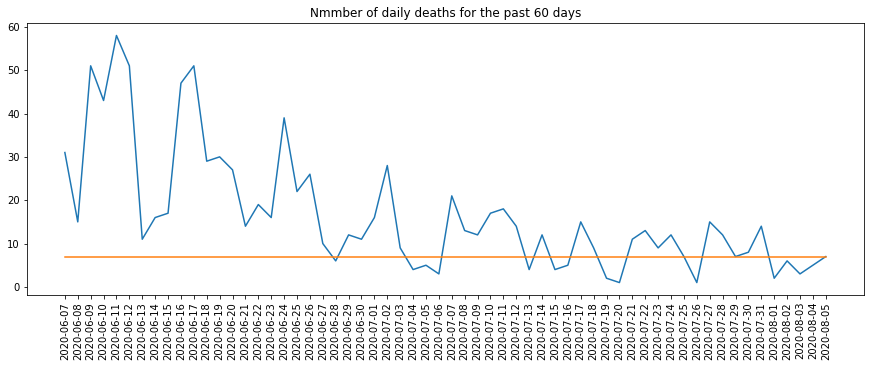

In [9]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Nmmber of daily deaths for the past 60 days")
ax.plot(last_60["date"], last_60["daily_deaths"])
x = [last_60["date"].head(1).values[0], last_60["date"].tail(1).values[0]]
y = [last_60["daily_deaths"].tail(1).values[0], last_60["daily_deaths"].tail(1).values[0]]
ax.plot(x,y)

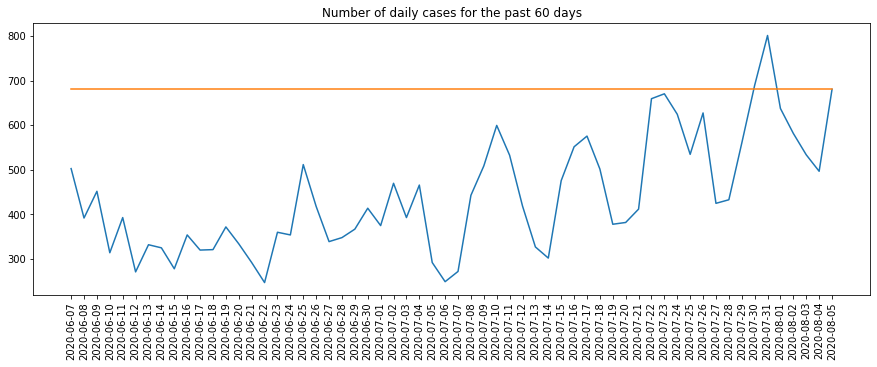

In [10]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
plt.xticks(rotation="90")
plt.title("Number of daily cases for the past 60 days")
ax.plot(last_60["date"], last_60["daily_cases"])
x = [last_60["date"].head(1).values[0], last_60["date"].tail(1).values[0]]
y = [last_60["daily_cases"].tail(1).values[0], last_60["daily_cases"].tail(1).values[0]]
ax.plot(x,y)

In [11]:
print("Number of daily cases for the past two weeks: \n")
print(last_60["daily_cases"].tail(14).values)

Number of daily cases for the past two weeks: 

[671. 625. 535. 628. 425. 433. 560. 690. 802. 638. 582. 534. 497. 681.]


In [12]:
print("Number of deaths for the past two weeks: \n")
print(last_60["daily_deaths"].tail(14).values)

Number of deaths for the past two weeks: 

[ 9. 12.  7.  1. 15. 12.  7.  8. 14.  2.  6.  3.  5.  7.]
